## Exploring the different datasets

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
pd.get_option("display.max_columns",None)
pd.get_option("display.max_rows", None)
import seaborn as sns

In [3]:
app = pd.read_csv('credit_application_data.csv')
pre_app = pd.read_csv('credit_previous_application.csv')

In [4]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Percentage of null values in all columns

In [6]:
app_null = app.isnull().sum()*100/len(app)
app_null = app_null.sort_values(ascending = False)
app_null
app_null.shape

(122,)

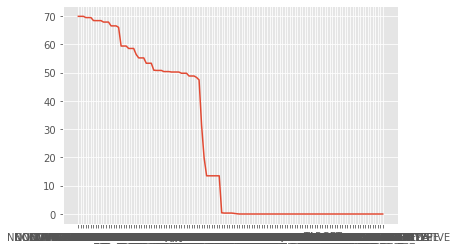

In [7]:
null = plt.plot(app_null)

In [8]:
print(f'The largest % of null values in a column: {round(max(app_null[app_null>0]),2)}')
print(f'The smallest % of null values in a column: {min(app_null.values)}%')

print(f'Amount of rows with null values: {app_null[app_null>0].shape[0]}')
print(f'Amount of rows without null values:  {app.shape[1] - app_null[app_null > 0].shape[0]}')

The largest % of null values in a column: 69.87
The smallest % of null values in a column: 0.0%
Amount of rows with null values: 67
Amount of rows without null values:  55


In [9]:
print(f'The amount of columns that have more than 50% of missing values:\
{app_null[app_null>50].shape[0]}')
print(f'That is {round((app_null[app_null>50].shape[0]/app.shape[1])*100,2)}% of all columns')

The amount of columns that have more than 50% of missing values:41
That is 33.61% of all columns


# DROP data about living circumstances
- Name_Type_Suite = who accompanyed the client when he/she applied. 
- REGION_RATING_CLIENT, REGION_RATING_CLIENT = region rating of bank.
- EXT_SOURCE_1-3 = Normalized score from external source
- APARTMENTS_AVG
- BASEMENTAREA_AVG
- YEARS_BEGINEXPLUATATION_AVG
- YEARS_BUILD_AVG
- COMMONAREA_AVG
- ELEVATORS_AVG
- ENTRANCES_AVG
- FLOORSMAX_AVG
- FLOORSMIN_AVG
- LANDAREA_AVG
- LIVINGAPARTMENTS_AVG
- LIVINGAREA_AVG
- NONLIVINGAPARTMENTS_AVG
- NONLIVINGAREA_AVG
- APARTMENTS_MODE
- BASEMENTAREA_MODE
- YEARS_BEGINEXPLUATATION_MODE
- YEARS_BUILD_MODE
- COMMONAREA_MODE
- ELEVATORS_MODE
- ENTRANCES_MODE
- FLOORSMAX_MODE
- FLOORSMIN_MODE
- LANDAREA_MODE
- LIVINGAPARTMENTS_MODE
- LIVINGAREA_MODE
- NONLIVINGAPARTMENTS_MODE
- NONLIVINGAREA_MODE
- APARTMENTS_MEDI
- BASEMENTAREA_MEDI
- YEARS_BEGINEXPLUATATION_MEDI
- YEARS_BUILD_MEDI
- COMMONAREA_MEDI
- ELEVATORS_MEDI
- ENTRANCES_MEDI
- FLOORSMAX_MEDI
- FLOORSMIN_MEDI
- LANDAREA_MEDI
- LIVINGAPARTMENTS_MEDI
- LIVINGAREA_MEDI
- NONLIVINGAPARTMENTS_MEDI
- NONLIVINGAREA_MEDI
- FONDKAPREMONT_MODE
- HOUSETYPE_MODE
- TOTALAREA_MODE
- WALLSMATERIAL_MODE
- EMERGENCYSTATE_MODE 


In [10]:
list(app.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [11]:
 app_filter = app.drop(['WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','NAME_TYPE_SUITE',\
                        'REGION_RATING_CLIENT','REGION_RATING_CLIENT','EXT_SOURCE_1','EXT_SOURCE_2',\
                        'EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',\
                        'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG',\
                        'FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG',\
                        'NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE',\
                        'YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE',\
                        'ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE',\
                        'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI',\
                        'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI',\
                        'ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI',\
                        'LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI',\
                        'FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE'],axis = 1)
    
app_filter.shape

(307511, 70)

In [12]:
print('70 columns from the original 122 are left.')

70 columns from the original 122 are left.


## Repeat analysis for null values

In [13]:
app_null = app_filter.isnull().sum()*100/len(app)
app_null = app_null.sort_values(ascending = False)

In [14]:
print(f'The largest % of null values in a column: {round(max(app_null[app_null>0]),2)}')
print(f'The smallest % of null values in a column: {min(app_null.values)}%')

print(f'Amount of rows with null values: {app_null[app_null>0].shape[0]}')
print(f'Amount of rows without null values:  {app_filter.shape[1] - app_null[app_null > 0].shape[0]}')

The largest % of null values in a column: 65.99
The smallest % of null values in a column: 0.0%
Amount of rows with null values: 16
Amount of rows without null values:  54


In [15]:
print(f'The amount of columns that have more than 50% of missing values:\
{app_null[app_null>50].shape[0]}')
print(f'That is {round((app_null[app_null>50].shape[0]/app_filter.shape[1])*100,2)}% of all columns')

The amount of columns that have more than 50% of missing values:1
That is 1.43% of all columns


# Explore Dataset:

- Distribution of ages

43.93697278587161
43.15068493150685


Text(0.5, 1.0, 'Histogram of Age')

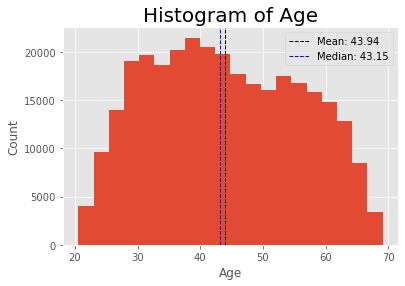

In [66]:
age_mean = ((app_filter['DAYS_BIRTH'].mean()/365)*-1)
age_median = ((app_filter['DAYS_BIRTH'].median()/365)*-1)
print(age_mean)
print(age_median)

fig, ax = plt.subplots()

plt.hist((app_filter['DAYS_BIRTH']/365)*-1, bins = 20)

plt.axvline((app_filter['DAYS_BIRTH'].mean()/365)*-1, color='k',\
            linestyle='dashed', linewidth=1, \
            label = 'Mean: {:.2f}'.format(age_mean))

plt.axvline((app_filter['DAYS_BIRTH'].median()/365)*-1, color='b',\
            linestyle='dashed', linewidth=1, \
            label = 'Median: {:.2f}'.format(age_median))

leg = ax.legend();
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age', fontsize = 20)

- Distribution of credit

- Type of loan

<AxesSubplot:>

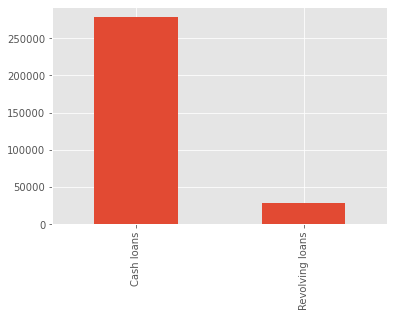

In [69]:
app_filter['NAME_CONTRACT_TYPE'].value_counts().plot.bar()

- Gender

<AxesSubplot:>

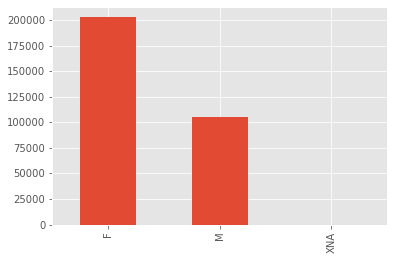

In [73]:
gender = app_filter['CODE_GENDER'].dropna()
gender
gender.value_counts().plot.bar()

In [76]:
gender_count = gender.value_counts()
gender_per = gender.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
gender_count = pd.DataFrame({'counts': gender_count, 'per100': gender_per})
gender_count = gender_count.reset_index()

gender_count = gender_count.rename(columns = {"index": "Gender"})
gender_count

,Gender,counts,per100
0,F,202448,65.8%
1,M,105059,34.2%
2,XNA,4,0.0%


- Distribution of income

25650.0
117000000.0


<AxesSubplot:xlabel='SK_ID_CURR'>

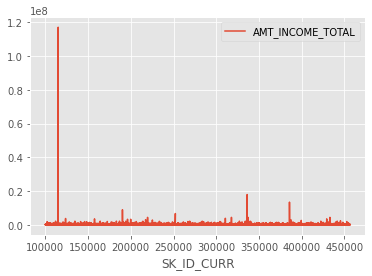

In [85]:
print(app_filter['AMT_INCOME_TOTAL'].min())
print(app_filter['AMT_INCOME_TOTAL'].max())

app_filter.plot(x = 'SK_ID_CURR', y = 'AMT_INCOME_TOTAL')

-230


<AxesSubplot:xlabel='SK_ID_CURR'>

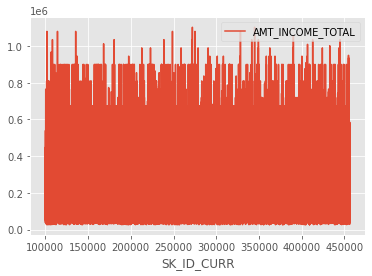

In [99]:
scatter_df = app_filter[['AMT_INCOME_TOTAL','SK_ID_CURR']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 4).all(axis = 1)]

print(scatter_df.shape[0] - app_filter.shape[0])
scatter_df.plot(x = 'SK_ID_CURR', y = 'AMT_INCOME_TOTAL')

Text(0.5, 1.0, 'Histogram of total income')

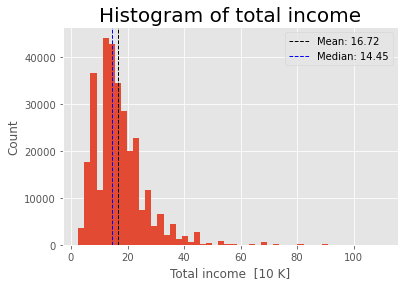

In [108]:
fig, ax = plt.subplots()

plt.hist(scatter_df['AMT_INCOME_TOTAL']/10000, bins = 50)

plt.axvline(scatter_df['AMT_INCOME_TOTAL'].mean()/10000, color='k',\
            linestyle='dashed', linewidth=1, \
            label = 'Mean: {:.2f}'.format(scatter_df['AMT_INCOME_TOTAL'].mean()/10000))
plt.axvline(scatter_df['AMT_INCOME_TOTAL'].median()/10000, color = 'b',\
            linestyle = 'dashed',linewidth = 1,\
            label = 'Median: {:.2f}'.format(scatter_df['AMT_INCOME_TOTAL'].median()/10000))

leg = ax.legend();

plt.xlabel('Total income  [10 K]')
plt.ylabel('Count')
plt.title('Histogram of total income', fontsize = 20)

- Amount of goods loan is for

Text(0.5, 1.0, 'Histogram of total loan amount')

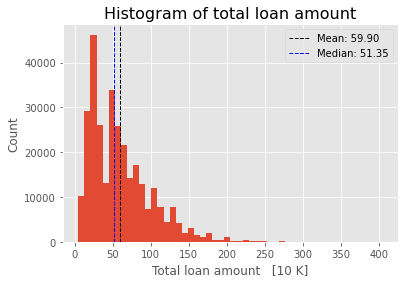

In [112]:
fig, ax = plt.subplots()

plt.hist(app_filter['AMT_CREDIT']/10000, bins = 50)

plt.axvline(app_filter['AMT_CREDIT'].mean()/10000, color='k',\
            linestyle='dashed', linewidth=1, \
            label = 'Mean: {:.2f}'.format(app_filter['AMT_CREDIT'].mean()/10000))
plt.axvline(app_filter['AMT_CREDIT'].median()/10000, color = 'b',\
            linestyle = 'dashed',linewidth = 1,\
            label = 'Median: {:.2f}'.format(app_filter['AMT_CREDIT'].median()/10000))

leg = ax.legend();

plt.xlabel('Total loan amount   [10 K]')
plt.ylabel('Count')
plt.title('Histogram of total loan amount', fontsize = 16)

- Education 

<AxesSubplot:>

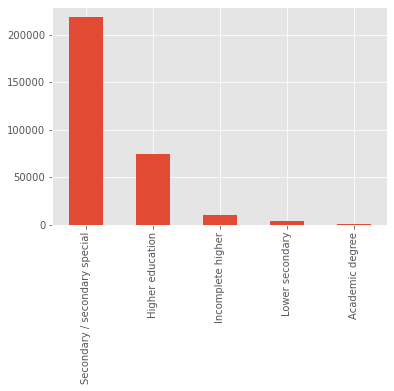

In [113]:
app_filter['NAME_EDUCATION_TYPE'].value_counts().plot.bar()

- Urban or not

Text(0.5, 1.0, 'Histogram of living environment')

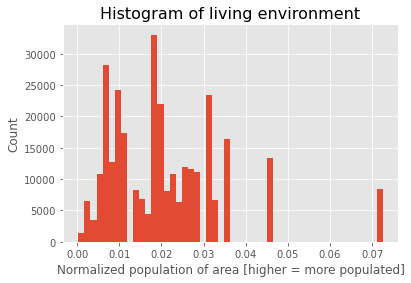

In [115]:
plt.hist(app_filter['REGION_POPULATION_RELATIVE'], bins = 50)

leg = ax.legend();

plt.xlabel('Normalized population of area [higher = more populated]')
plt.ylabel('Count')
plt.title('Histogram of living environment', fontsize = 16)

- Time of employment

-17912
365243


<AxesSubplot:xlabel='SK_ID_CURR'>

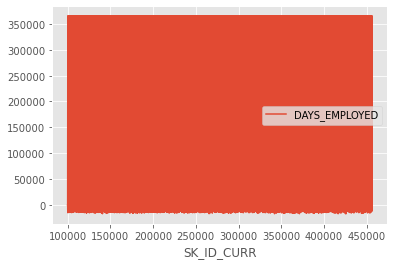

In [120]:
print(app_filter['DAYS_EMPLOYED'].min())
print(app_filter['DAYS_EMPLOYED'].max())

app_filter.plot(x = 'SK_ID_CURR', y = 'DAYS_EMPLOYED')

-17912.0
0.0


<AxesSubplot:xlabel='SK_ID_CURR'>

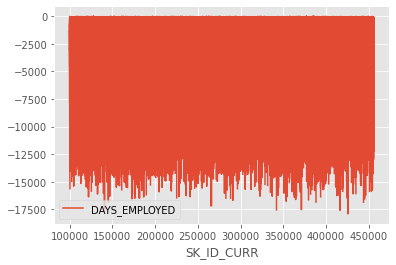

In [132]:
#app_filter['DAYS_EMPLOYED'].isnull().sum()
app_filter.loc[app_filter['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = np.nan

print(app_filter['DAYS_EMPLOYED'].min())
print(app_filter['DAYS_EMPLOYED'].max())

app_filter.plot(x = 'SK_ID_CURR', y = 'DAYS_EMPLOYED')

6.531970752364948
4.515068493150685


Text(0.5, 1.0, 'Histogram of Employment time')

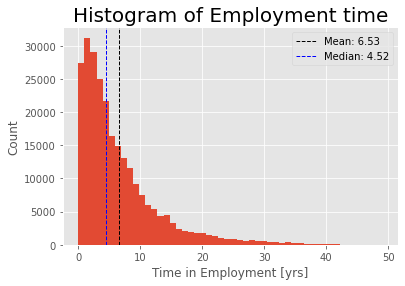

In [134]:
age_mean = ((app_filter['DAYS_EMPLOYED'].mean()/365)*-1)
age_median = ((app_filter['DAYS_EMPLOYED'].median()/365)*-1)
print(age_mean)
print(age_median)

fig, ax = plt.subplots()

plt.hist((app_filter['DAYS_EMPLOYED']/365)*-1, bins = 50)

plt.axvline((app_filter['DAYS_EMPLOYED'].mean()/365)*-1, color='k',\
            linestyle='dashed', linewidth=1, \
            label = 'Mean: {:.2f}'.format(age_mean))

plt.axvline((app_filter['DAYS_EMPLOYED'].median()/365)*-1, color='b',\
            linestyle='dashed', linewidth=1, \
            label = 'Median: {:.2f}'.format(age_median))

leg = ax.legend();
plt.xlabel('Time in Employment [yrs]')
plt.ylabel('Count')
plt.title('Histogram of Employment time', fontsize = 20)


- Days since registration and id was changes

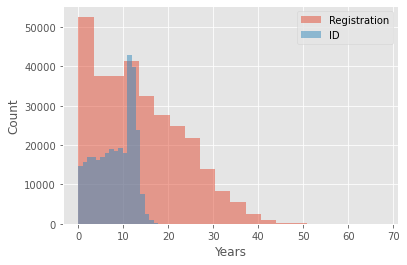

In [152]:
x = (app_filter['DAYS_REGISTRATION']/365)*-1
y = (app_filter['DAYS_ID_PUBLISH']/365)*-1

bins = 20

plt.hist(x, bins, alpha=0.5, label='Registration')
plt.hist(y, bins, alpha=0.5, label='ID')
plt.legend(loc='upper right')
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

- Day of week of application

<AxesSubplot:>

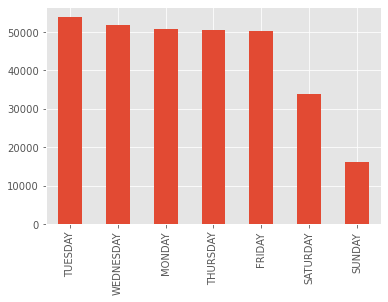

In [135]:
app_filter['WEEKDAY_APPR_PROCESS_START'].value_counts().plot.bar()

- percentage of Documents provided (21 total)

0    1
1    1
2    0
3    1
4    1
5    1
6    2
7    1
8    1
9    0
dtype: int64


<AxesSubplot:>

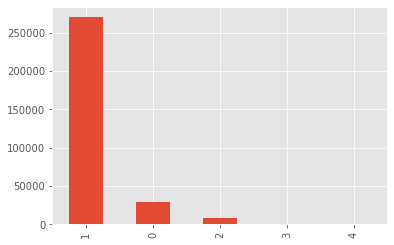

In [145]:
colm = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',\
        'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',\
        'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',\
        'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
documents = app_filter.loc[:,colm].sum(axis=1)
print(documents.head(10))
documents.value_counts().plot.bar()


- Amount of previous application and the amount actually given

- Interest on previous credit

- Previous credit rejected or not

- TARGET!!

<AxesSubplot:>

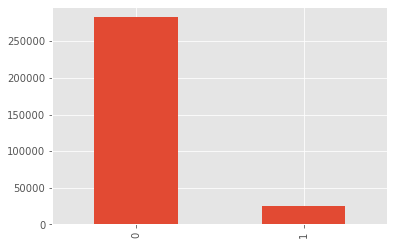

In [136]:
app_filter['TARGET'].value_counts().plot.bar()

In [137]:
target_cnt = app_filter['TARGET'].value_counts()
target_per = app_filter['TARGET'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
target_cnt = pd.DataFrame({'counts': target_cnt, 'per100': target_per})
target_cnt = target_cnt.reset_index()

target_cnt = target_cnt.rename(columns = {"index": "Target"})
target_cnt

,Target,counts,per100
0,0,282686,91.9%
1,1,24825,8.1%


colors = {'North America':'red', 'Europe':'green', 'Asia':'blue', 'Australia':'yellow'}


ax.scatter(df['population'], df['Area'], c=df['continent'].map(colors))

plt.show()